In [1]:
import numpy as np
import pandas as pd
import prospect
import prospect.plotting
import scipy.stats
import matplotlib.pyplot as plt
from tqdm import tqdm

np.random.seed(5)

## Sample universe

Let's define a very simple generic sample universe.

In [ ]:
# sample_universe = prospect.Area.from_area_value("sample_universe", 10000, vis=1.0)

In [15]:
# sample_universe.df.plot()

100%|██████████| 22/22 [00:17<00:00,  1.27it/s]


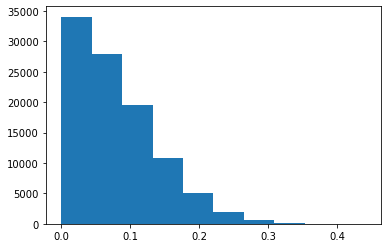

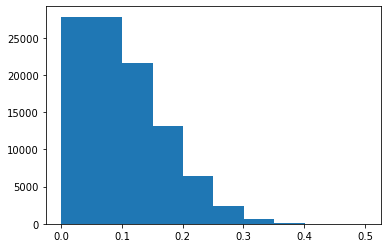

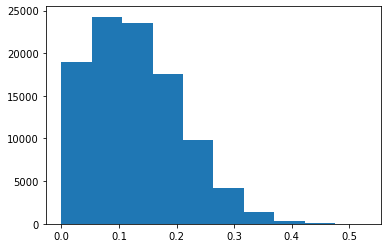

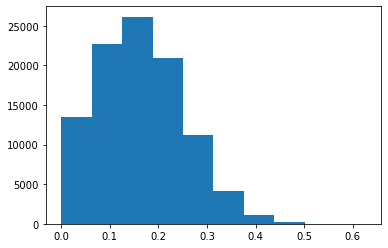

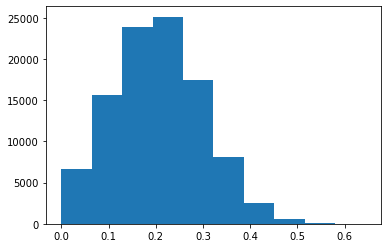

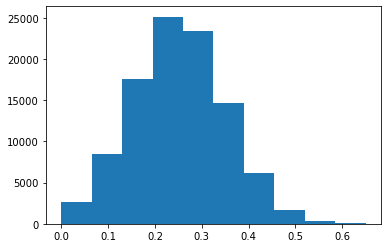

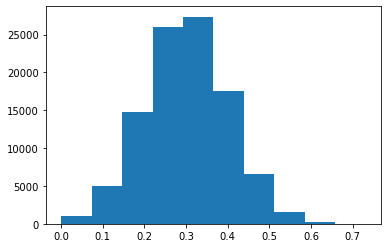

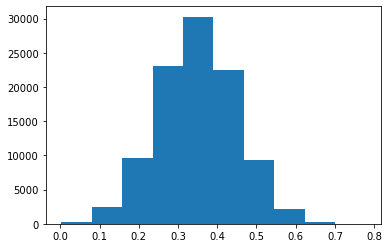

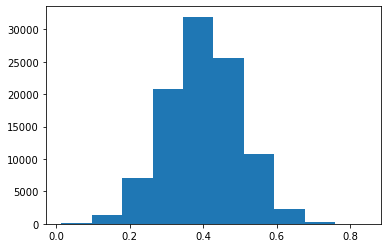

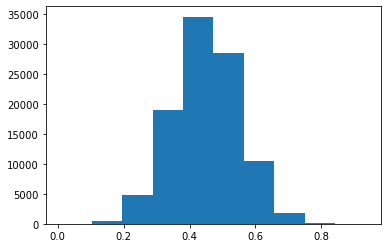

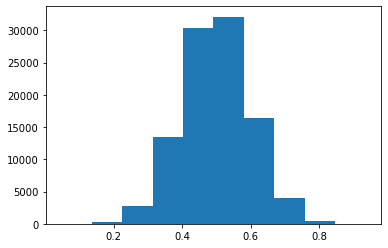

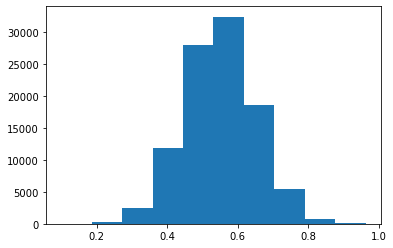

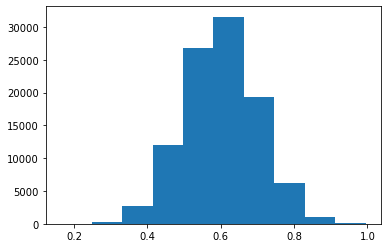

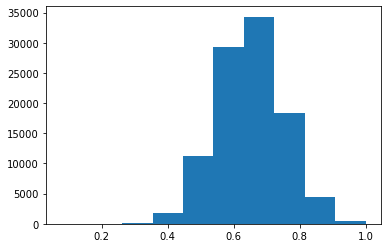

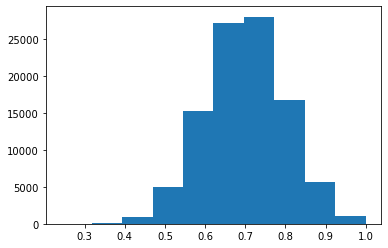

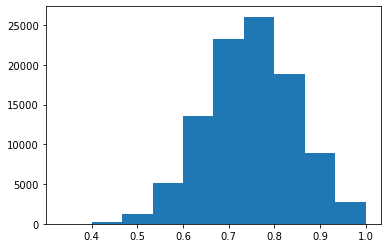

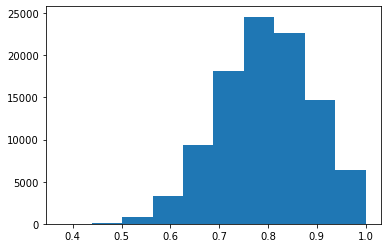

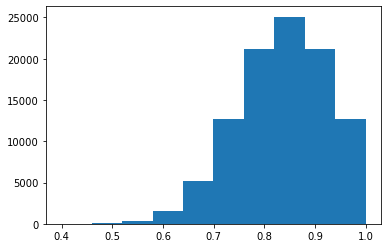

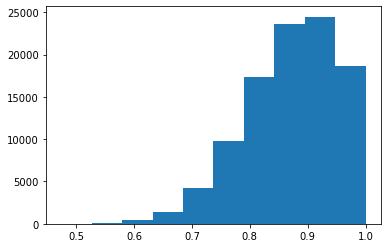

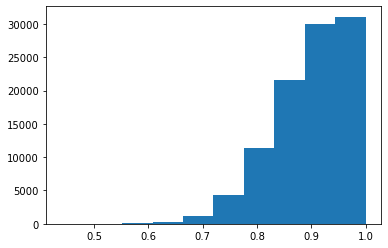

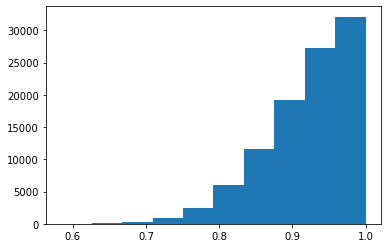

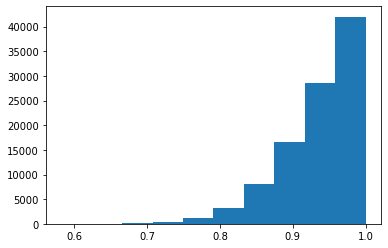

In [10]:
for vis_value in tqdm(np.arange(0, 1.1, 0.1)):
    fig, ax = plt.subplots()
    dist = prospect.utils.truncnorm(
        mean=vis_value, 
        sd=0.1, 
        lower=0, 
        upper=1.0
    )

    ax.hist(dist.rvs(100000), );

In [8]:
surveys = {}
dummy_sample_universe = prospect.Area.from_area_value(
        "sample_universe", 10000
        )

sample_population_lithics = prospect.Layer.from_poisson_points(
    rate=0.001, 
    area=dummy_sample_universe, 
    assemblage_name="sample_population", 
    name="lithics"
)

sample_population_ceramics = prospect.Layer.from_thomas_points(
    parent_rate=0.001, 
    child_rate=5, 
    gauss_var=5,
    name="ceramics",
    area=dummy_sample_universe,
    assemblage_name="sample_population"
)

sample_population = prospect.Assemblage(
    name="sample_population", 
    area_name="sample_universe", 
    layer_list=[sample_population_lithics, sample_population_ceramics]
)

sample_units = prospect.Coverage.from_transects(name="transect_10m", area=dummy_sample_universe, orientation=90)

surveyor = prospect.Surveyor(name="surveyor", team_name="Survey Team", surveyor_type="expert", skill=1.0, speed_penalty=0)
survey_team = prospect.Team(name="Survey Team", surveyor_list=[surveyor], assignment="naive")

for vis_value in tqdm(np.arange(0, 1.1, 0.1)):
    sample_universe = prospect.Area.from_area_value(
        "sample_universe", 10000, 
        vis=prospect.utils.truncnorm(
            mean=vis_value, 
            sd=0.1, 
            lower=0, 
            upper=1.0)
        )

    survey = prospect.Survey(
        name="visibility_test", 
        area=sample_universe, 
        assemblage=sample_population,
        coverage=sample_units,
        team=survey_team 
    )

    survey.run(n_runs=500)

    surveys[vis_value]= survey

100%|██████████| 11/11 [05:51<00:00, 31.95s/it]


In [ ]:
surveys[0.9].discovery

In [6]:
91 * 500

45500

In [5]:
sample_population.df["layer_name"].value_counts()

ceramics    91
lithics     10
Name: layer_name, dtype: int64

In [9]:
for key in surveys.keys():
    print(key)
    print(
        surveys[key].discovery
        .merge(sample_population.df.loc[:, ["feature_name", "layer_name"]], how="left", on="feature_name")
        .groupby("layer_name")
        .agg(
            type_counts = pd.NamedAgg("layer_name", "count"),
            mean_discovery_prob = pd.NamedAgg("discovery_prob", "mean"),
            median_discovery_prob = pd.NamedAgg("discovery_prob", "median")

        )
    )
    print("\n")

0.0
            type_counts  mean_discovery_prob  median_discovery_prob
layer_name                                                         
ceramics          12500             0.079015               0.066619
lithics            6000             0.080724               0.068021


0.1
            type_counts  mean_discovery_prob  median_discovery_prob
layer_name                                                         
ceramics          12500             0.129805               0.121576
lithics            6000             0.128581               0.120788


0.2
            type_counts  mean_discovery_prob  median_discovery_prob
layer_name                                                         
ceramics          12500             0.206418               0.202834
lithics            6000             0.204272               0.200508


0.30000000000000004
            type_counts  mean_discovery_prob  median_discovery_prob
layer_name                                                         
ceramics  

# START HERE
- Why don't the type counts match up?
- If you mostly have perfect visibility, you still won't find everything (not even close, really).

In [ ]:
sample_population_lithics.df.plot()

In [ ]:
sample_population_ceramics.df.plot(color="red")

In [ ]:
sample_population.df.plot(column='layer_name', legend=True)

In [ ]:
sample_units.df.plot()

In [ ]:
prospect.Surveyor(name="surveyor", team_name="Survey Team", surveyor_type="expert", skill=1.0, speed_penalty=0)